# Inverted Pendulum

Consider an inverted pendulum, consisting of a point mass $m$ at the end of a light rod of length $\ell$. An oscillating force $a\cos\omega t$ is applied vertically to the other end of the rod. The Lagrangian for this system is

$$L=\tfrac{1}{2}m(\ell^2\dot{\theta}^2+\omega^2a^2\sin^2\omega t+2\Omega a\ell\sin\omega t\sin\theta\dot{\theta})-mg(a\cos\omega t+\ell\cos\theta)$$

and hence Lagrange's equation gives

$$\ell^2\ddot{\theta}+\omega^2a\ell\cos\omega t\sin\theta~-g\ell\sin\theta=0~~~.$$

Let's start by numerically integrating the equation of motion. A red dot in the plot below indicates the point mass's initial position, which follows a trajectory to its final position indicated by the blue dot.

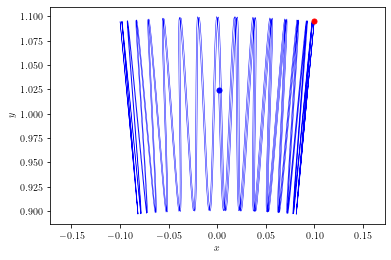

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

ell=1.0
omega=50
a=0.1
g=10
time=5

def dxdt(x,t):
    theta,dot_theta=x
    dtheta_dt=dot_theta
    d2theta_dt2=(g/ell)*np.sin(theta)-(omega**2*a/ell)*np.cos(omega*t)*np.sin(theta)
    return dtheta_dt, d2theta_dt2

x_0=[0.1,0]
t=np.linspace(0,time,num=1000)
theta,dot_theta=odeint(dxdt,x_0,t).T

x=ell*np.sin(theta)
y=a*np.cos(omega*t)+ell*np.cos(theta)

plt.rc('text',usetex=True)
plt.rc('font',family='serif')    

plt.figure(1)
plt.plot(x,y,lw=0.5,color='b')
plt.plot(x[0],y[0],ms=5,color='r',marker='o')
plt.plot(x[-1],y[-1],ms=5,color='b',marker='o')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis('equal')
plt.show()

Evidently, the point mass is following an oscillatory trajectory and is staying upright. The oscillations are about the equilibrium angle $\theta_{\text{eq}}=0$, which is further demonstrated in the plot below.

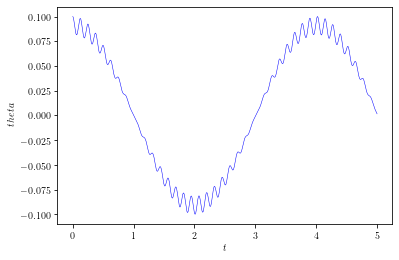

In [5]:
plt.figure(2)
plt.plot(t,theta,lw=0.5,color='b')
plt.xlabel('$t$')
plt.ylabel('$theta$')
plt.show()

As a way of approximately solving this equation of motion, we shall use the following ansatz

$$\theta(t)=\theta_1(t)+C(t)\cos\omega t+S(t)\sin\omega t$$

where is assumed that $\theta_1$, $C$ and $S$ are slowly-varying quantities. It can be shown that the equation of motion reduces to the sum of 'fast' $\sin\omega t$ and $\cos\omega t$ terms plus a 'slow' term. From this, we find

$$\ell^2\ddot{\theta}_1=\tfrac{1}{2}g\ell\sin\theta_1\bigg(2-\frac{\omega^4a^2\ell^2\cos\theta_1}{\omega^2\ell^2+g\ell\cos\theta_1}\bigg)$$

and that oscillations of $\theta_1(t)$ about an equilbrium value $\theta_1=0$ are only possible if

$$\omega^2\gtrsim\frac{2g\ell}{a^2}~~~.$$

In other words, if the frequency of the applied oscillating force is high enough, the inverted pendulum remains upright!

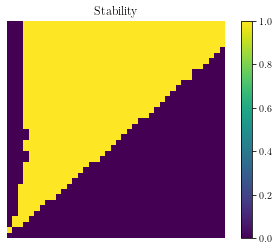

In [70]:
def dxdt(x,t,a,g,ell,omega):
    theta,dot_theta=x
    dtheta_dt=dot_theta
    d2theta_dt2=(g/ell)*np.sin(theta)-(omega**2*a/ell)*np.cos(omega*t)*np.sin(theta)
    return dtheta_dt, d2theta_dt2

time=10
x_0=[0.1,0]
t=np.linspace(0,time,num=1000)

inva_array=np.linspace(1,11,num=40)
g=0.5
ell=1
omega_array=np.linspace(1,11,num=40)

stability=np.array([[0.0]*len(inva_array)]*len(omega_array))

x=-1
y=-1

for omega in omega_array:
    x+=1
    for inva in inva_array:
        y+=1
        a=1/inva
        param=(a,g,ell,omega)
        theta,dot_theta=odeint(dxdt,x_0,t,args=param).T
        if max(theta)>np.pi/2:
            stability[x][y]=0
        else:
            stability[x][y]=1
    y=-1
    
plt.imshow(stability[:,:],origin='lower')
plt.colorbar()
plt.axis('off')
plt.title('Stability')
plt.show()

Setting $2g\ell=1$, we expect stability when $\omega\gtrsim a^{-1}$ and the plot above is in broad agreement with this.